 **                                                                     TOXIC Comments : Sentiment Analysis                                            **

**Brief Introduction**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack


In [2]:
#NLP tools
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')

In [3]:
#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")

In [4]:
import os
os.chdir("C:/Users/asus/Desktop/projectDS")


sample_submission.csv
test.csv
train.csv



In [5]:
#Loading the Data
train = pd.read_csv('train.csv', error_bad_lines=False).fillna(' ')
test = pd.read_csv('test.csv', error_bad_lines=False).fillna(' ')
subm = pd.read_csv('sample_submission.csv')

In [6]:
#A quick look at our training dataset
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# the size of our training dataset
train.shape

(159571, 8)

**Finding more information on the data**

Total number of toxic comments:

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                             max_df=0.5,
                             min_df=4,
                             max_features=1000)
vector_space_model = vectorizer.fit_transform(train['comment_text'].values.astype('U').tolist()) # converting the dtype object to unicode string 
n_comments = vector_space_model.shape[0]
print('%d Total Comments' % n_comments)

159571 Total Comments


In [9]:
training_set_size = int(n_comments * 0.33)
X = vector_space_model[:training_set_size,:]
Z = vector_space_model[training_set_size:vector_space_model.shape[0]-1,:]
print('%d comments for the estimation of the parameters and %d for the evaluation' % 
      (X.shape[0], Z.shape[0]))

52658 comments for the estimation of the parameters and 106912 for the evaluation


In [10]:
from sklearn import linear_model

X = X.toarray()
Y = train['toxic'][:training_set_size]
model = linear_model.BayesianRidge(verbose=True)
model.fit(X, Y)

Convergence after  4  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=True)

In [11]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

ground_truth = train['toxic'][training_set_size:vector_space_model.shape[0]-1]
prediction = model.predict(Z)
prediction = binarize(prediction.reshape(-1, 1), 0.5)

In [12]:
toxic_ids = [i for i, c in enumerate(prediction) if c == 1]
toxic_ids

[18,
 26,
 31,
 44,
 46,
 69,
 134,
 141,
 147,
 149,
 161,
 168,
 223,
 248,
 268,
 288,
 300,
 383,
 384,
 399,
 403,
 489,
 492,
 524,
 544,
 565,
 566,
 592,
 633,
 658,
 713,
 750,
 783,
 787,
 809,
 814,
 828,
 843,
 851,
 861,
 872,
 908,
 933,
 944,
 975,
 1000,
 1007,
 1028,
 1065,
 1108,
 1249,
 1252,
 1310,
 1313,
 1327,
 1393,
 1438,
 1464,
 1480,
 1489,
 1492,
 1510,
 1605,
 1616,
 1726,
 1737,
 1747,
 1780,
 1822,
 1829,
 1841,
 1845,
 1919,
 1976,
 1977,
 1990,
 2012,
 2022,
 2034,
 2133,
 2168,
 2201,
 2208,
 2216,
 2217,
 2226,
 2245,
 2267,
 2313,
 2403,
 2440,
 2459,
 2467,
 2493,
 2502,
 2519,
 2526,
 2533,
 2574,
 2606,
 2650,
 2662,
 2688,
 2694,
 2707,
 2713,
 2755,
 2787,
 2821,
 2905,
 2989,
 3051,
 3066,
 3073,
 3098,
 3110,
 3174,
 3191,
 3228,
 3252,
 3267,
 3278,
 3292,
 3293,
 3336,
 3345,
 3373,
 3379,
 3405,
 3452,
 3456,
 3545,
 3601,
 3631,
 3652,
 3660,
 3676,
 3699,
 3707,
 3770,
 3771,
 3802,
 3861,
 3862,
 3870,
 3889,
 3898,
 3928,
 3937,
 3958,
 

**Checking for sample toxic comments**

In [13]:
comment_id = toxic_ids[0]
print('Content of the comment: \n%s\n' % train['comment_text'][training_set_size+comment_id])
print('Is this comment "toxic" according to the model?\n%s' % str(model.predict(Z[comment_id,:]) >0.5))

Content of the comment: 
You are an arse! 

SHUTUP!

Is this comment "toxic" according to the model?
[ True]


In [14]:
comment_id = toxic_ids[1]
print('Content of the comment: \n%s\n' % train['comment_text'][training_set_size+comment_id])
print('Is this comment "toxic" according to the model?\n%s' % str(model.predict(Z[comment_id,:]) >0.5))

Content of the comment: 
Dog -n- Suds article 

I'm sorry for coming off as such an asshole on the edit to dog n suds.  I was pissed off that day because I got 3 people threatening to ban me over retarded shit, I was mostly just being a smartass and was expecting it get reverted back and threatened with yet another banning.   I can't seem to do shit right here. aw well fuck em. Just wanted to say sorry  (    )

Is this comment "toxic" according to the model?
[ True]


In [15]:
comment_id = toxic_ids[2]
print('Content of the comment: \n%s\n' % train['comment_text'][training_set_size+comment_id])
print('Is this comment "toxic" according to the model?\n%s' % str(model.predict(Z[comment_id,:]) >0.5))

Content of the comment: 
GO TO HELL. i.e. piss off

Is this comment "toxic" according to the model?
[ True]


**Working on Clean Comments**

Now, we will create a new column for "clean" comments. These comments  correspond to none of the 6 categories as stated above.

In [16]:
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
train['clean'].sum()

143346

**Bar Charts : Showcasing the categories of toxic comments**

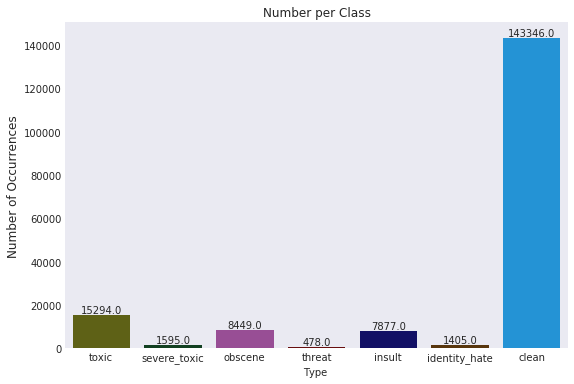

In [17]:
colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Number per Class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

We have more than 1.4 lakhs clean comments. And, we can see that we have a very unbalanced dataset. Even non-clean comments are not equally reparted. This might be an issue whilel training the learning algorithms. This also means that if we predict 'clean' for each comment, our result will not be so bad in term of accuracy.



In [18]:
# A list that contains all the text data
comment_text_list = train.apply(lambda row : nltk.word_tokenize( row['comment_text']),axis=1)

In [19]:
comment_text_list.head()

0    [Explanation, Why, the, edits, made, under, my...
1    [D'aww, !, He, matches, this, background, colo...
2    [Hey, man, ,, I, 'm, really, not, trying, to, ...
3    [``, More, I, ca, n't, make, any, real, sugges...
4    [You, ,, sir, ,, are, my, hero, ., Any, chance...
dtype: object

**Odd Comments : Containing a high rate of punctuation symbols or capital letters**

In [20]:
#An odd comment contains a high rate of punctuation symbols or capital letters
rate_punctuation=0.7
rate_capital=0.7
def odd_comment(comment):
    punctuation_count=0
    capital_letter_count=0
    total_letter_count=0
    for token in comment:
        if token in list(string.punctuation):
            punctuation_count+=1
        capital_letter_count+=sum(1 for c in token if c.isupper())
        total_letter_count+=len(token)
    return((punctuation_count/len(comment))>=rate_punctuation or 
           (capital_letter_count/total_letter_count)>rate_capital)

odd=comment_text_list.apply(odd_comment)

In [21]:
odd_ones=odd[odd==True]
odd_comments=train.loc[list(odd_ones.index)]
odd_comments[odd_comments.clean==False].count()/len(odd_comments)

id               0.654298
comment_text     0.654298
toxic            0.654298
severe_toxic     0.654298
obscene          0.654298
threat           0.654298
insult           0.654298
identity_hate    0.654298
clean            0.654298
dtype: float64

Hence, we could see that more than 65% of the so-called odd comments are not clean. It seems to be an interesting feature to add to the dataset. So, we will have to train a model for these specific odd comments that cannot be treated the same way as the normal or the clean ones. 

**Bar Charts : Showcasing the categories of toxic comments based on Odd Comments**

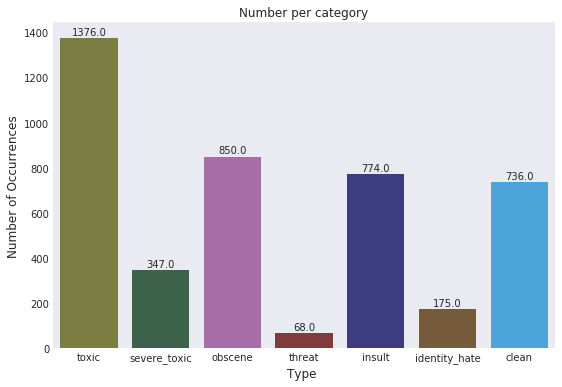

In [22]:
colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette= sns.xkcd_palette(colors_list)

x=odd_comments.iloc[:,2:].sum()


plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values, alpha=0.8, palette=palette)
plt.title("Number per category")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [23]:
# A quick check for empty comments
empty_comments=train[train.comment_text==""]
empty_comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean


In [24]:
# A quick check for duplicated comments
duplicate=train.comment_text.duplicated()
duplicate[duplicate==True]

Series([], Name: comment_text, dtype: bool)

In [25]:
# Storing each categories of non clean comments in specific arrays
toxic=train[train.toxic==1]['comment_text'].values
severe_toxic=train[train.severe_toxic==1]['comment_text'].values
obscene=train[train.obscene==1]['comment_text'].values
threat=train[train.threat==1]['comment_text'].values
insult=train[train.insult==1]['comment_text'].values
identity_hate=train[train.identity_hate==1]['comment_text'].values

**Exploring toxic data from WordCloud Patterns**

Wordclouds are a quick way to see which words are dominant in a text. Now, we will see that which words are the most dominated in toxic labeled comments.

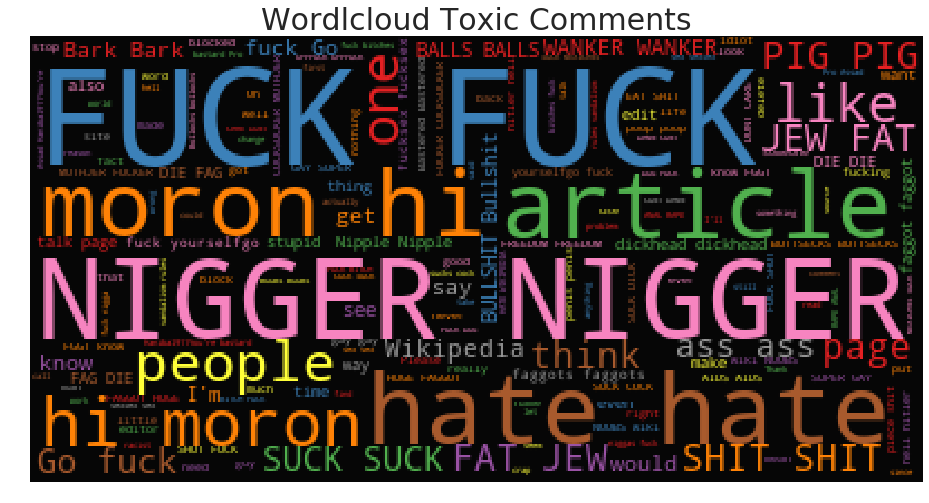

In [26]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=500, stopwords=stopwords, max_font_size= 60)
wc.generate(" ".join(toxic))
plt.title("Wordlcloud Toxic Comments", fontsize=30)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')
plt.savefig('Toxic_wc.png')

It's time for some text processing now.

**Lemmatization**

In [27]:
replacement_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'cannot'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')
]
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
         self.patterns = [(re.compile(regex), repl) for (regex, repl) in
         patterns]
     
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
             s = re.sub(pattern, repl, s)
        return s

In [28]:
from nltk.stem import WordNetLemmatizer
lemmer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import TweetTokenizer
#from replacers import RegexpReplacer
replacer = RegexpReplacer()
tokenizer=TweetTokenizer()

def comment_process(category):
    category_processed=[]
    for i in range(category.shape[0]):
        comment_list=tokenizer.tokenize(replacer.replace(category[i]))
        comment_list_cleaned= [word for word in comment_list if ( word.lower() not in stopwords 
                              and word.lower() not in list(string.punctuation) )]
        comment_list_lemmed=[lemmer.lemmatize(word, 'v') for word in comment_list_cleaned]
        category_processed.extend(list(comment_list_lemmed))
    return category_processed

In [29]:
toxic1=comment_process(toxic)

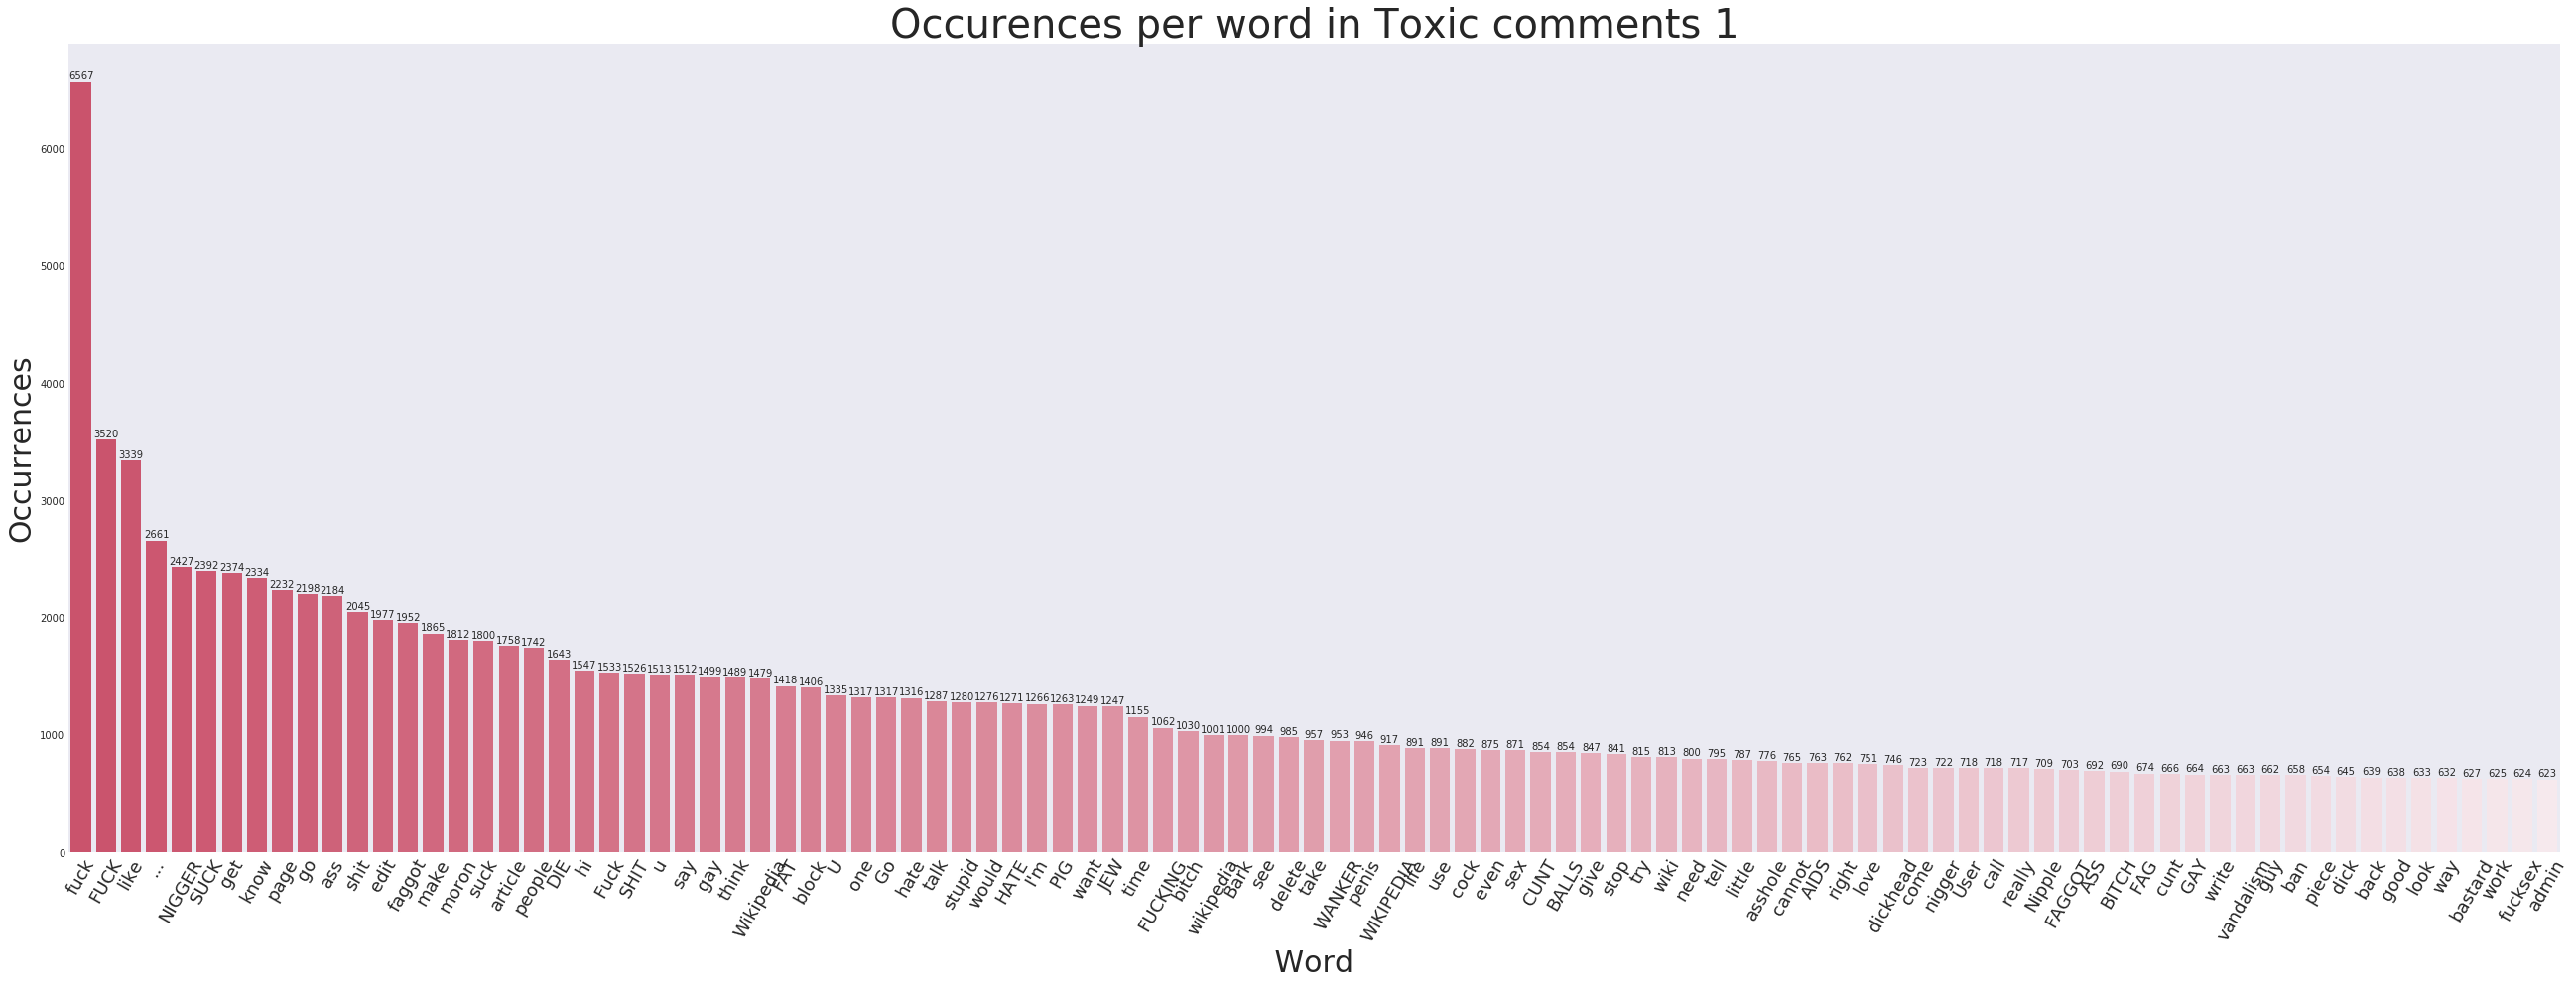

In [30]:
fd=nltk.FreqDist(word for word in toxic1)

x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]

palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)

plt.title("Occurences per word in Toxic comments 1", fontsize=40)
plt.ylabel('Occurrences', fontsize=30)
plt.xlabel(' Word ', fontsize=30)

# Adding the text labels
rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

The bar chart/plot can be opened in a new tab/window for a bigger and better view.

From the above plot, we could see that some of the toxic words have lots of occurences which do not have any existance  in the first wordcloud. 
Hence, using the word cloud library on unprocessed data in the first place might be misleading. 

So, it seems that we have some more work to do on the data processing part.

True

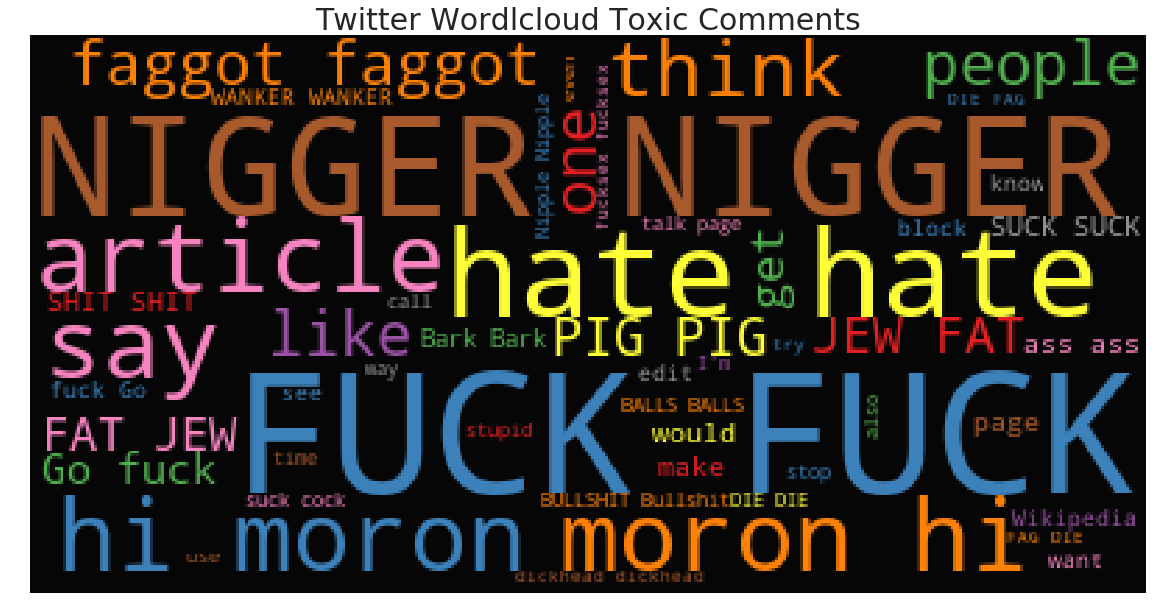

In [31]:
def wordcloud_plot(category, name) : 
    plt.figure(figsize=(20,15))
    wc = WordCloud(background_color="black", max_words=500, min_font_size=6 
                 , stopwords=stopwords, max_font_size= 60)
    wc.generate(" ".join(category))
    plt.title("Twitter Wordlcloud " + name +  " Comments", fontsize=30)
    # plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Set1' , random_state=21), alpha=0.98)
    plt.axis('off')
    plt.savefig(name+'_wc.png')
    return(True)

wordcloud_plot(toxic1,'Toxic')

In [32]:
severe_toxic1=comment_process(severe_toxic)
obscene1=comment_process(obscene)
threat1=comment_process(threat)
insult1=comment_process(insult)
identity_hate1=comment_process(identity_hate)

True

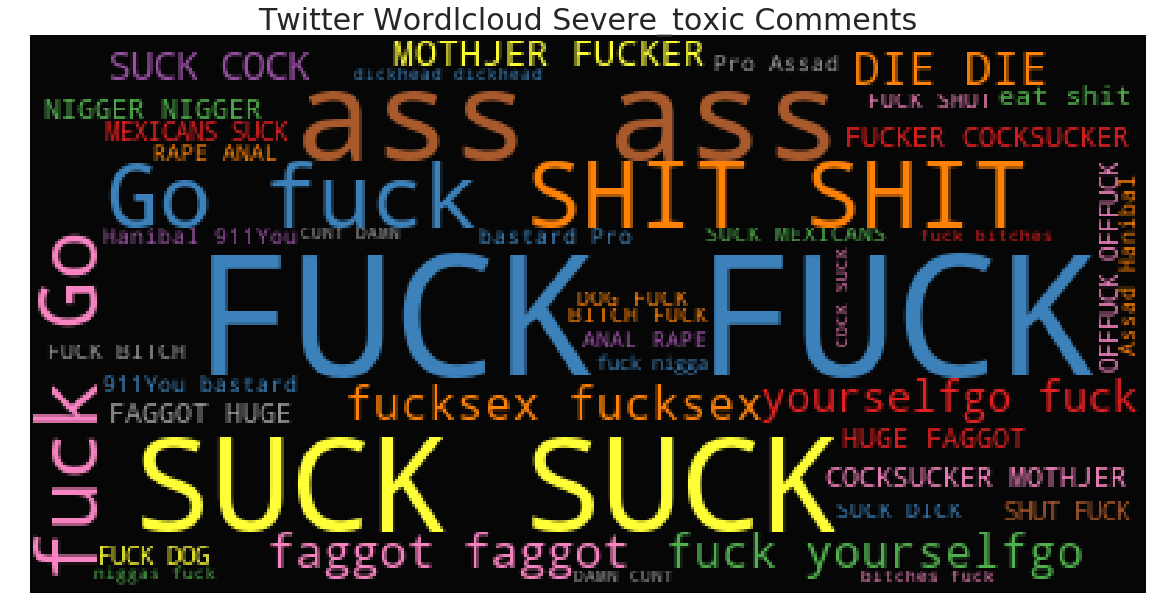

In [33]:
wordcloud_plot(severe_toxic1,'Severe_toxic')

True

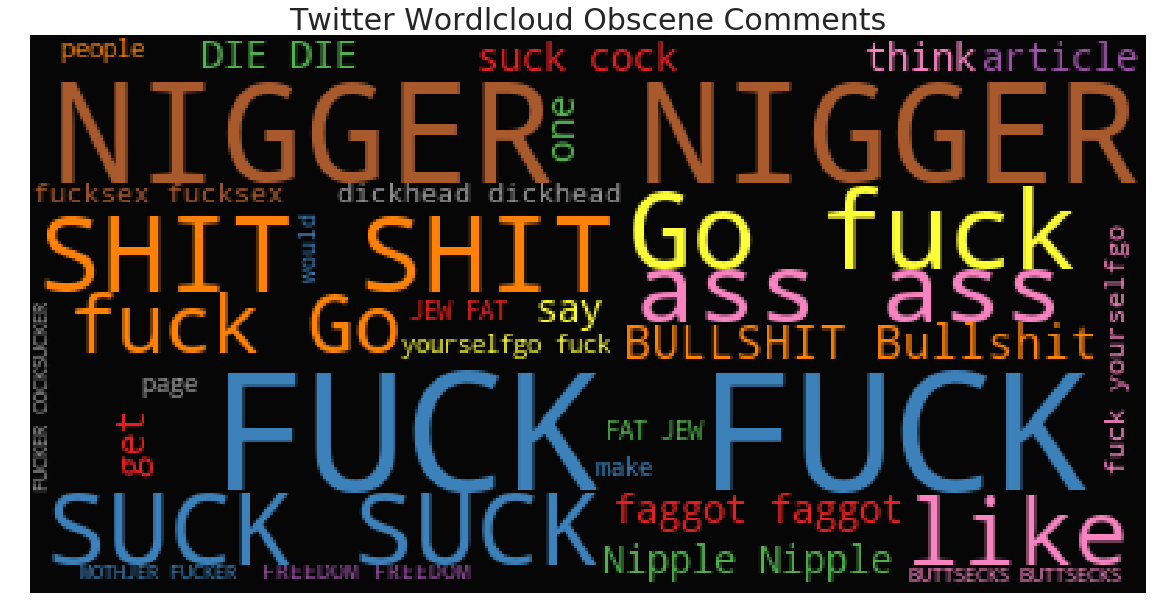

In [34]:
wordcloud_plot(obscene1,'Obscene')

True

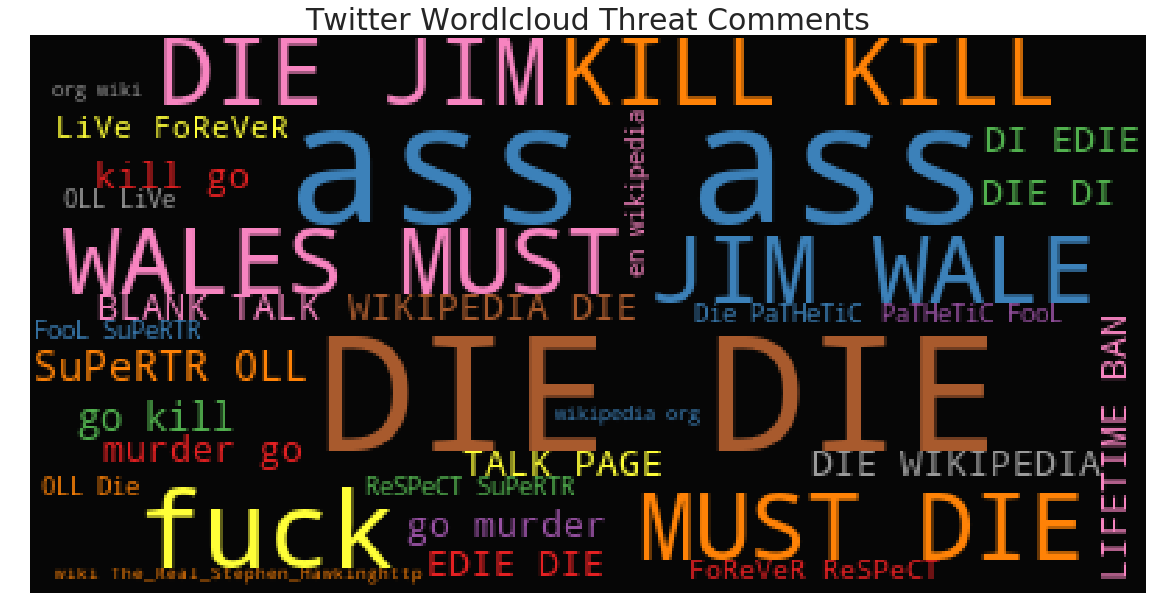

In [35]:
wordcloud_plot(threat1,'Threat')

True

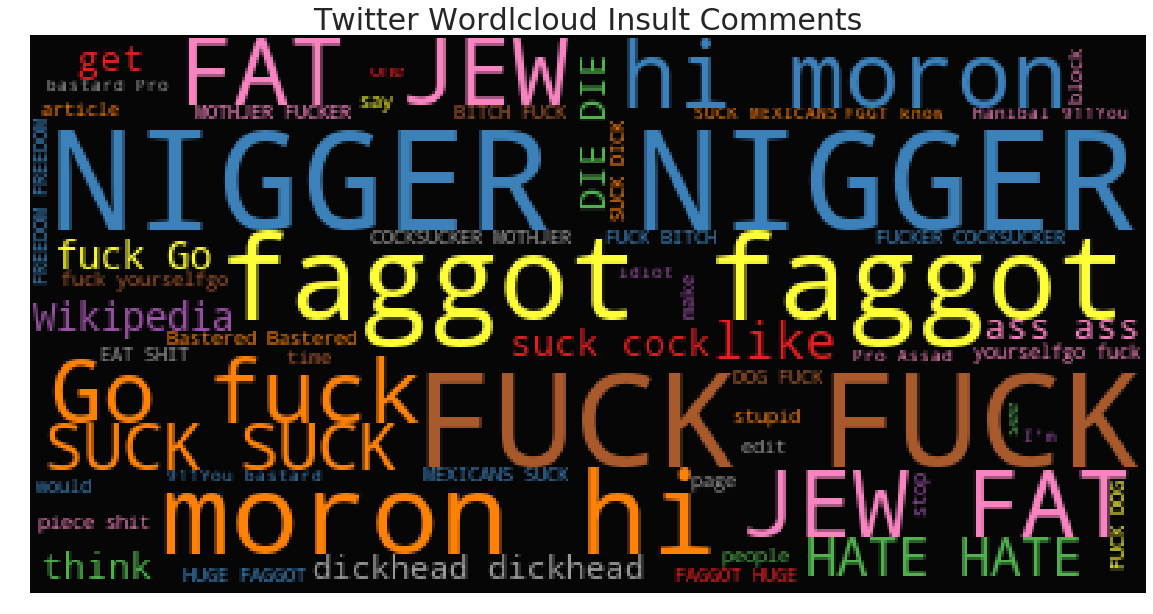

In [36]:
wordcloud_plot(insult1,'Insult')

True

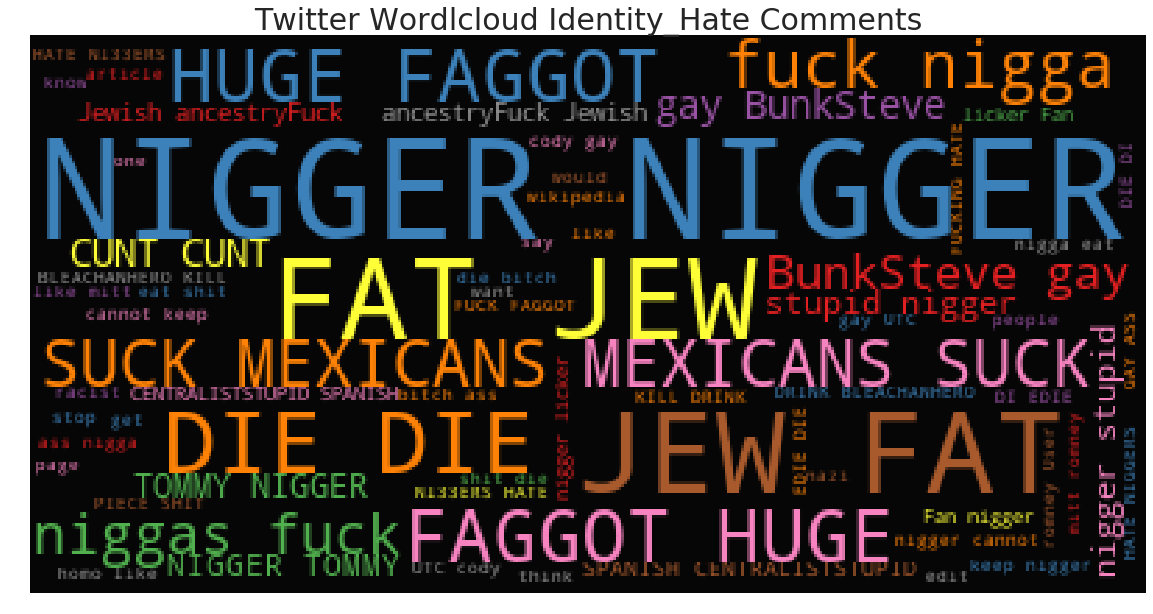

In [37]:
wordcloud_plot(identity_hate1,'Identity_Hate')

**Conclusion from the above wordcloud patterns**

Some categories(Wordcloud patterns) share the same vocabulary in terms of richness and word frequency, like Insult and Toxic categories. And some others, like Identity and Hate category, use specific words more frequently. 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [39]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=20000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 4),
    max_features=20000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})
for class_name in class_names:
    train_target = train[class_name]
    classifier = LogisticRegression(solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

CV score for class toxic is 0.9786734847003361
CV score for class severe_toxic is 0.9888047868938147
CV score for class obscene is 0.9903492399436952
CV score for class threat is 0.9890177212365442
CV score for class insult is 0.9828415506716391
CV score for class identity_hate is 0.9830985107158794
Total CV score is 0.9854642156936514
